Fernando Cerriteño Magaña A01702790

Leonardo Millán Velázquez A01639823

In [4]:
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE

from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import statsmodels.formula.api as smf


In [11]:
df = pd.read_csv('/content/501.csv')
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,12:42:04 a. m.,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,12:42:04 a. m.,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,12:42:04 a. m.,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,12:42:04 a. m.,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,12:42:04 a. m.,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [ ]:
df.columns

Index(['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y',
       'thigh_z', 'label'],
      dtype='object')

In [ ]:
df.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [ ]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,103860.000000,103860.000000,103860.000000,103860.000000,103860.000000,103860.000000,103860.000000
mean,-0.880883,-0.069506,-0.003201,-0.794307,-0.095594,-0.318354,3.237069
std,0.340989,0.128599,0.417656,0.599406,0.210591,0.547369,2.860101
min,-2.895264,-1.157471,-2.204834,-7.942139,-3.600830,-4.193604,1.000000
25%,-1.015625,-0.137939,-0.268066,-1.003174,-0.187256,-1.046875,1.000000
50%,-0.920898,-0.062500,-0.136963,-0.937500,-0.080322,-0.131348,1.000000
75%,-0.767517,-0.006836,0.234375,-0.203125,-0.015625,0.080078,6.000000
max,0.239746,0.893555,0.979004,1.159424,3.234863,1.861572,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103860 entries, 0 to 103859
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  103860 non-null  object 
 1   back_x     103860 non-null  float64
 2   back_y     103860 non-null  float64
 3   back_z     103860 non-null  float64
 4   thigh_x    103860 non-null  float64
 5   thigh_y    103860 non-null  float64
 6   thigh_z    103860 non-null  float64
 7   label      103860 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 6.3+ MB


In [ ]:
correlacion = df.corr()
alta_corr = np.where((correlacion>0.95)&(correlacion<1))
baja_corr = np.where((correlacion<-0.95)&(correlacion>-1))
if alta_corr[0].size == 0 and baja_corr[0].size == 0:
  print('Los datos no cuentan con correlación')
else:
  print('Los datos cuentan con correlación')

Los datos no cuentan con correlación


<ipython-input-11-3a6147dcc62d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


Analizando los datos se puede dar cuenta que estos no cuentan con correlación, no cuentan con valores nulos, y que a excepción de la columna timestamp, todos los datos seleccionados son de tipo numerico, combinado con la presencia de columnas que no cuentan con espacios en el nombre, se puede determinar que el dataframe esta listo para empezar a ser utilizado.

A continuación se muestran la graficas de las variables del dataframe contra el tiempo

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

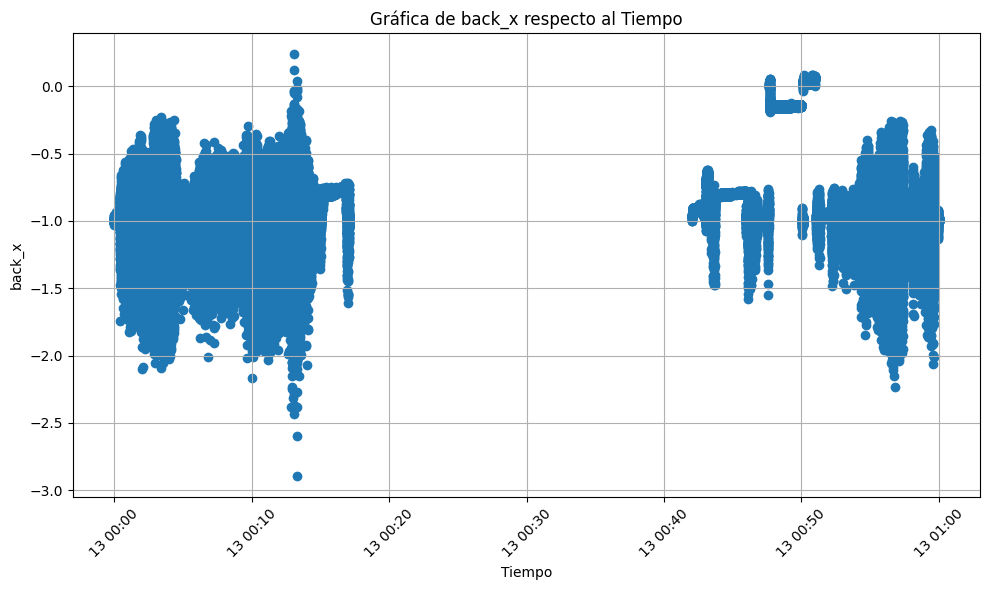

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['back_x'])
plt.title('Gráfica de back_x respecto al Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('back_x')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

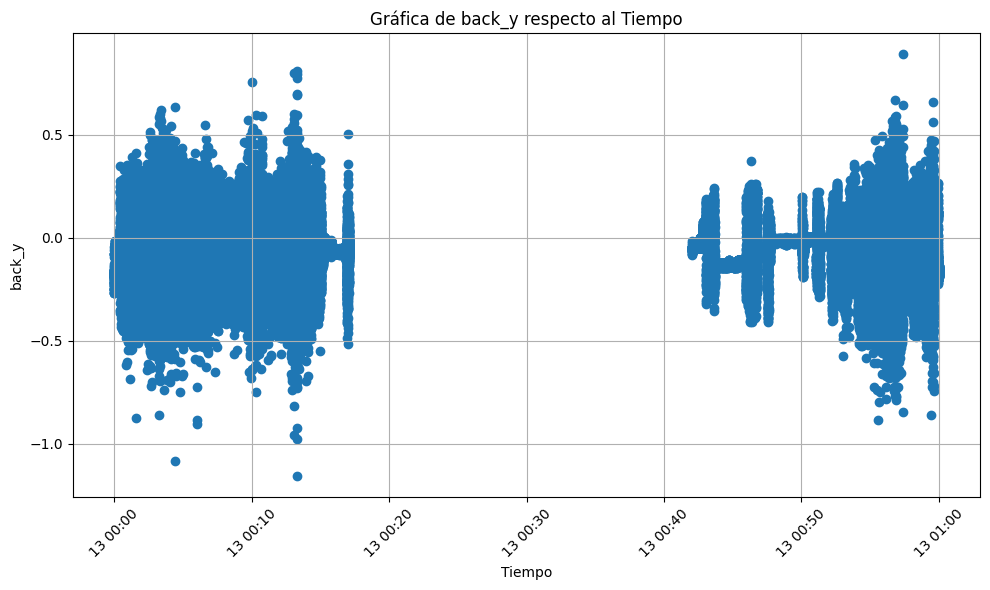

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['back_y'])
plt.title('Gráfica de back_y respecto al Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('back_y')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

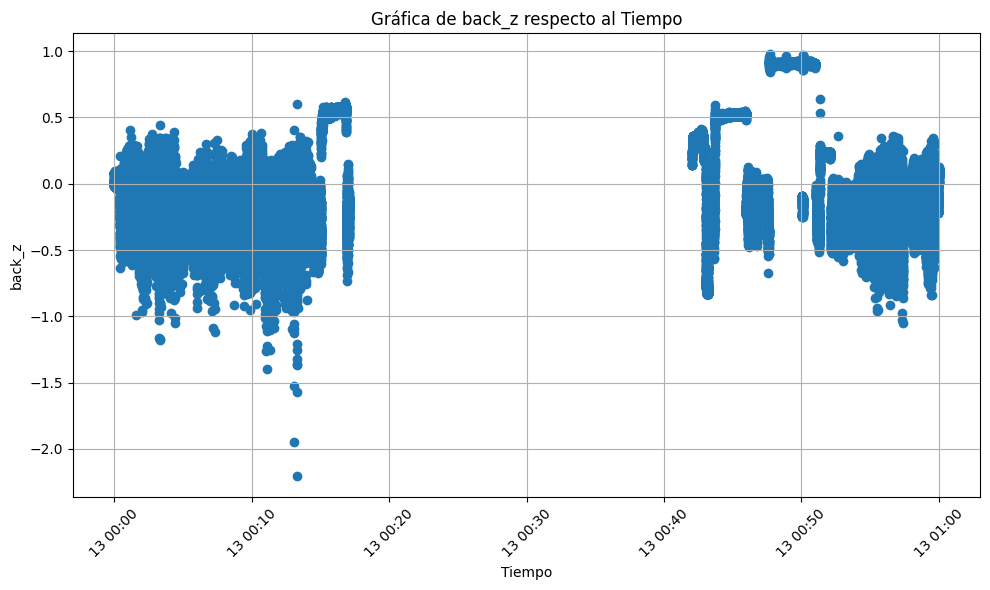

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['back_z'],marker='o')
plt.title('Gráfica de back_z respecto al Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('back_z')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

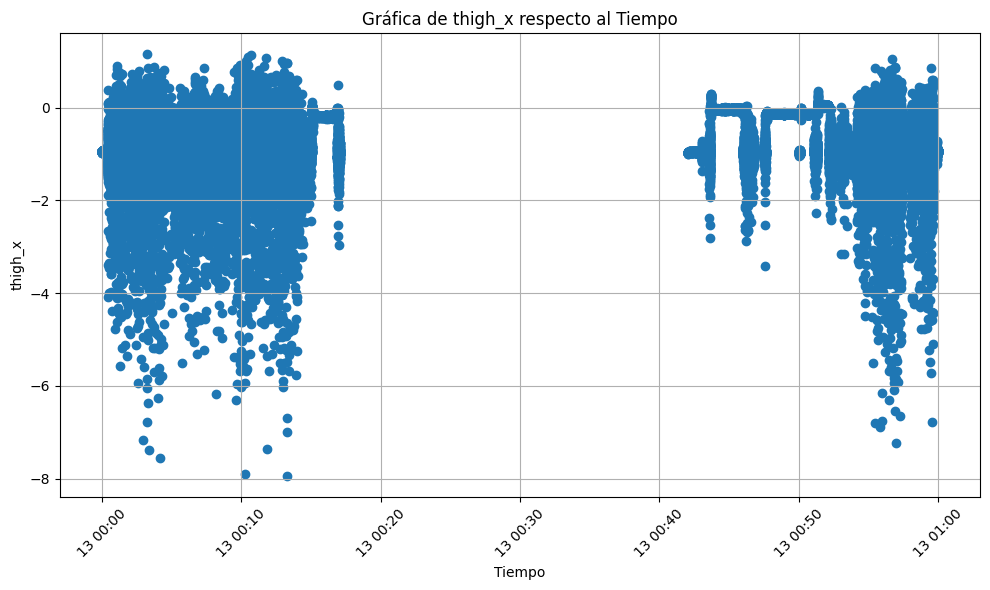

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['thigh_x'],marker='o')
plt.title('Gráfica de thigh_x respecto al Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('thigh_x')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

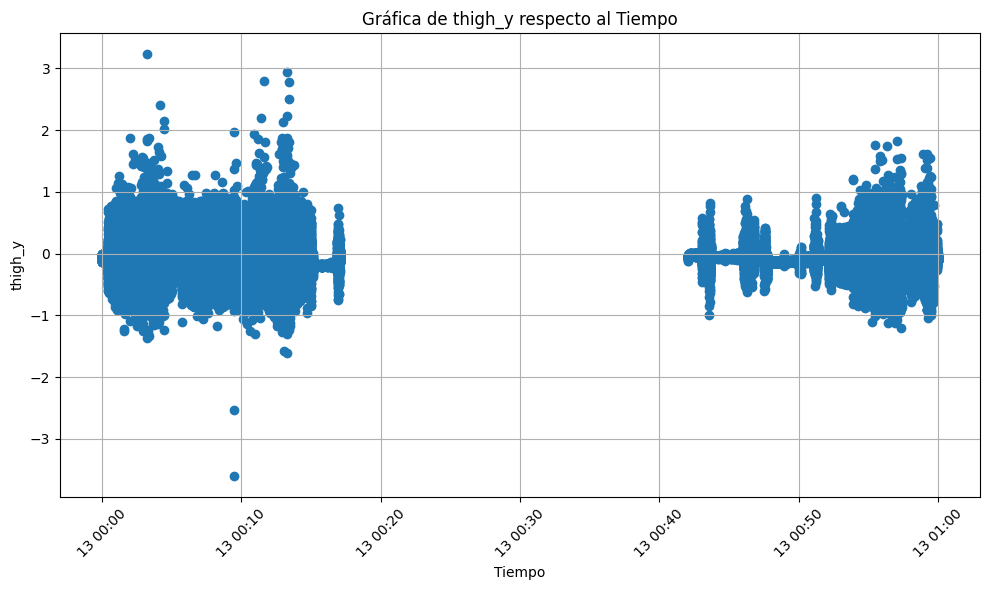

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['thigh_y'],marker='o')
plt.title('Gráfica de thigh_y respecto al Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('thigh_y')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

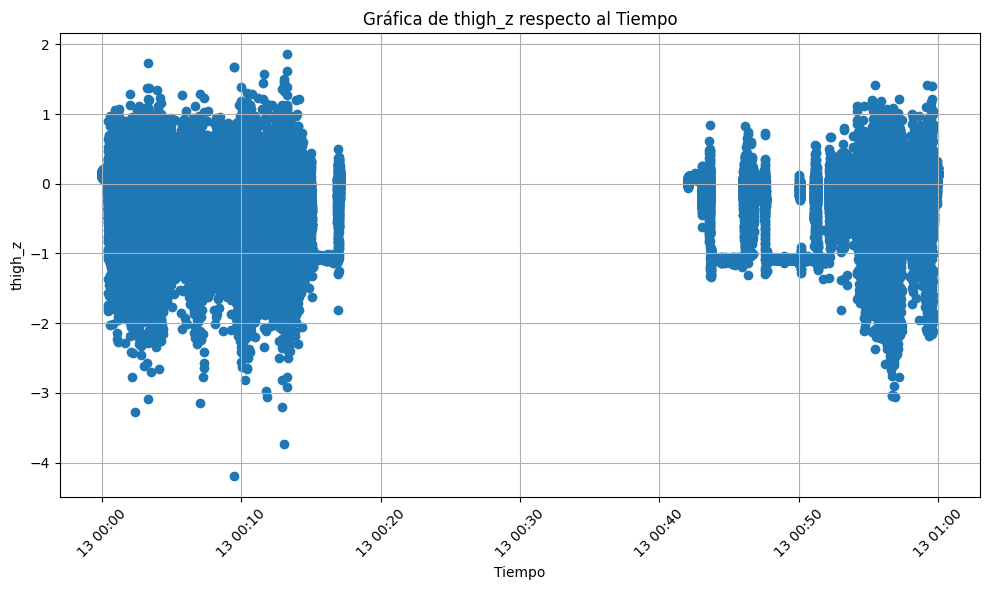

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['thigh_z'])
plt.title('Gráfica de thigh_z respecto al Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('thigh_z')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

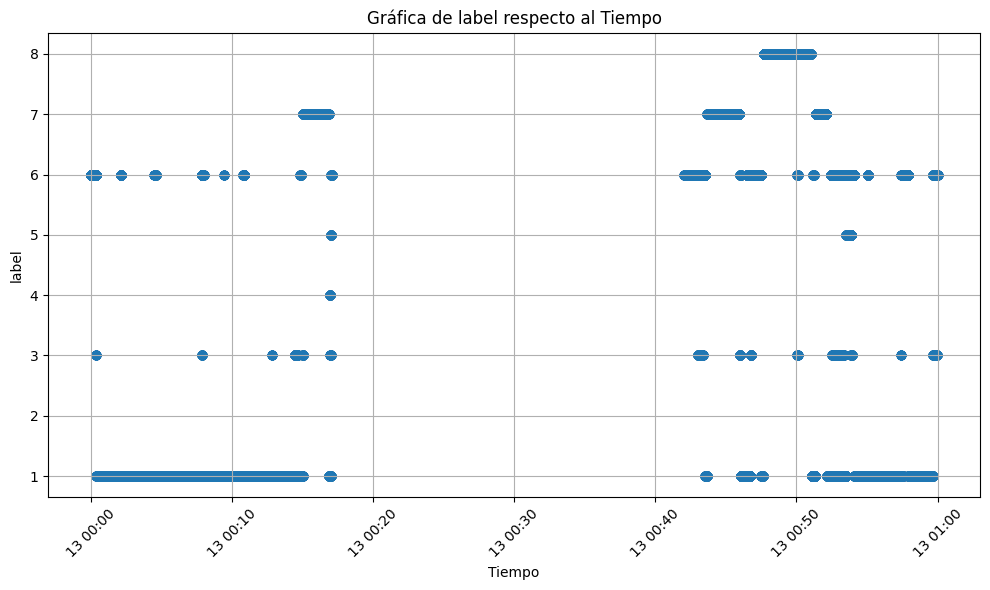

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['label'])
plt.title('Gráfica de label respecto al Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('label')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

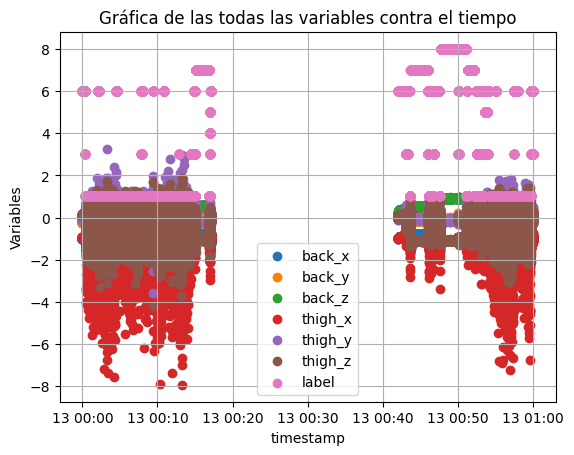

In [ ]:
columnas = ['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z','label']
for i in range(1,8):
  plt.scatter(df.iloc[:,0],df.iloc[:,i])
  plt.xlabel(df.columns[0])
  plt.legend(df.columns[1:])
  plt.ylabel('Variables')
  plt.title('Gráfica de las todas las variables contra el tiempo')
  plt.grid()

Balanceo de datos

Distribución de clases en porcentaje:
1    60.535336
7    14.020797
6    13.841710
8     9.222030
3     1.806278
5     0.485269
4     0.088581
Name: label, dtype: float64




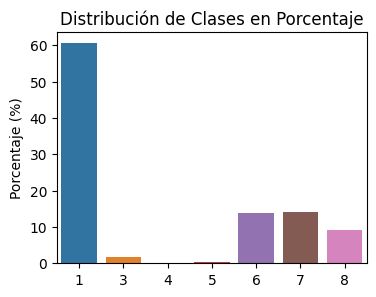

In [ ]:
distribucion_porcentaje = df.label.value_counts(normalize=True) * 100

print("Distribución de clases en porcentaje:")
print(distribucion_porcentaje)
print('\n')

plt.figure(figsize=(4, 3))
sns.barplot(x=distribucion_porcentaje.index, y=distribucion_porcentaje.values)
plt.title('Distribución de Clases en Porcentaje')
plt.ylabel('Porcentaje (%)')
plt.show()

En conclución creemos que los datos han sido preprocesados y explorados de manera exhaustiva, y se encuentran en condiciones óptimas para avanzar con la construcción de modelos, no obstante creemos que es recomendado aplicar una tecnica de balanceo debido al desbalanceo que se encuentra entre las clases. El enfoque ahora se desplazará hacia la implementación de algoritmos de aprendizaje automático y la evaluación del rendimiento del modelo en función de métricas relevantes.

<h2>Modelos de Clasificación

Ajuste de datos

In [12]:
df.drop('timestamp',axis=1,inplace = True)

x = df.iloc[:,:6]
y = df.label

x = x.to_numpy()
y = y.to_numpy()

1. SVM

Sin balanceo de datos

In [ ]:
Ekf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf_SVM = SVC(kernel = 'linear')
    clf_SVM.fit(x_test, y_test)

    y_pred = clf_SVM.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


              precision    recall  f1-score   support

           1       0.87      0.98      0.92     62872
           3       0.00      0.00      0.00      1876
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00       504
           6       0.85      0.52      0.64     14376
           7       1.00      1.00      1.00     14562
           8       1.00      1.00      1.00      9578

    accuracy                           0.90    103860
   macro avg       0.53      0.50      0.51    103860
weighted avg       0.88      0.90      0.88    103860



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


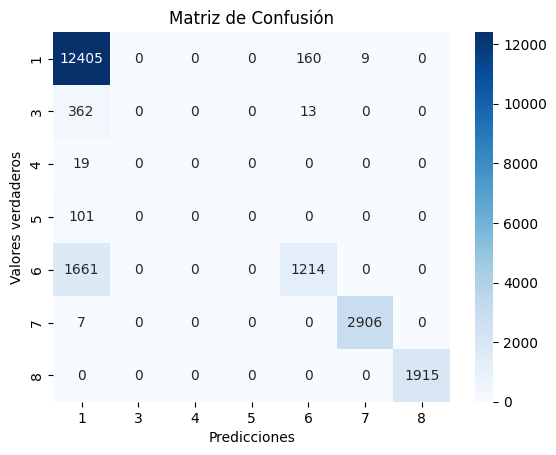

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
ax.set_yticklabels([1,3,4,5,6,7,8])
ax.set_xticklabels([1,3,4,5,6,7,8])
plt.show()

SVM con under-sampling

In [ ]:
# UnderSampling
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

num_classes = 8

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

    # Aplica el submuestreo a tus datos
    x_sub, y_sub = undersampler.fit_resample(x_train, y_train)

    clf_SVM_B = SVC(kernel='linear')
    clf_SVM_B.fit(x_sub, y_sub)

    y_pred = clf_SVM_B.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.96      0.32      0.48     62872
           3       0.04      0.25      0.06      1876
           4       0.01      0.57      0.01        92
           5       0.02      0.46      0.03       504
           6       0.56      0.89      0.69     14376
           7       0.95      1.00      0.97     14562
           8       1.00      1.00      1.00      9578

    accuracy                           0.56    103860
   macro avg       0.50      0.64      0.46    103860
weighted avg       0.89      0.56      0.62    103860



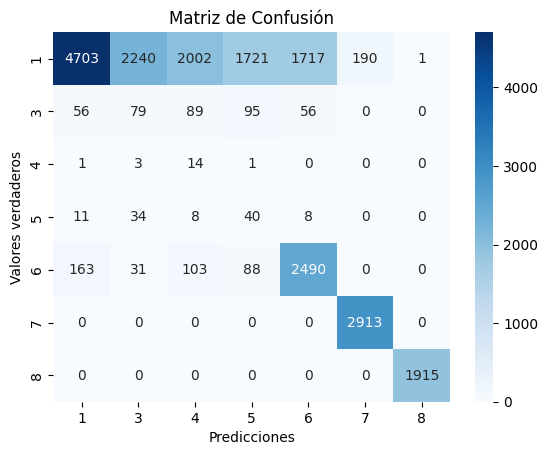

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
ax.set_yticklabels([1,3,4,5,6,7,8])
ax.set_xticklabels([1,3,4,5,6,7,8])
plt.show()

2. Clasificador Random Forest

Sin balanceo de datos

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_RFC = RandomForestClassifier()
    clf_RFC.fit(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = clf_RFC.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98     62872
           3       0.84      0.25      0.38      1876
           4       0.00      0.00      0.00        92
           5       0.87      0.08      0.15       504
           6       0.97      0.97      0.97     14376
           7       1.00      1.00      1.00     14562
           8       1.00      1.00      1.00      9578

    accuracy                           0.97    103860
   macro avg       0.81      0.61      0.64    103860
weighted avg       0.97      0.97      0.97    103860



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


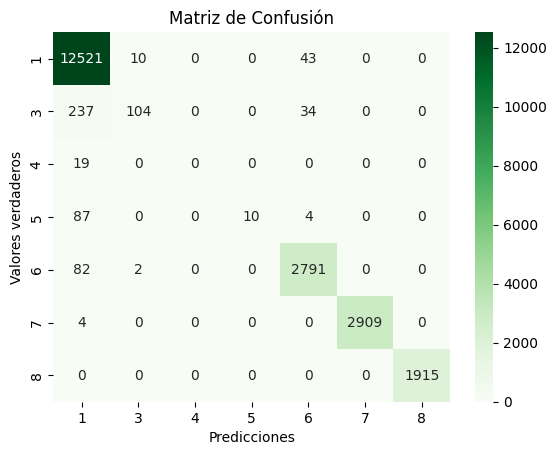

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
ax.set_yticklabels([1,3,4,5,6,7,8])
ax.set_xticklabels([1,3,4,5,6,7,8])
plt.show()

Random Forest con under-sampling

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

num_classes = 8

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

    # Aplica el submuestreo a tus datos
    x_sub, y_sub = undersampler.fit_resample(x_train, y_train)

    clf_RFC_B = RandomForestClassifier()
    clf_RFC_B.fit(x_sub, y_sub)

    y_pred = clf_RFC_B.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.99      0.67      0.80     62872
           3       0.14      0.54      0.22      1876
           4       0.01      0.74      0.02        92
           5       0.04      0.68      0.07       504
           6       0.90      0.87      0.88     14376
           7       0.98      1.00      0.99     14562
           8       1.00      1.00      1.00      9578

    accuracy                           0.77    103860
   macro avg       0.58      0.79      0.57    103860
weighted avg       0.96      0.77      0.84    103860



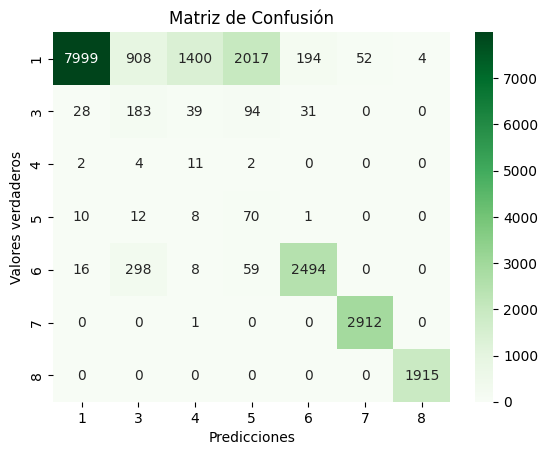

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
ax.set_yticklabels([1,3,4,5,6,7,8])
ax.set_xticklabels([1,3,4,5,6,7,8])
plt.show()

3. K-Vecinos más cercanos

Sin balanceo de datos

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_KNN = KNeighborsClassifier(n_neighbors=3)
    clf_KNN.fit(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = clf_KNN.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98     62872
           3       0.63      0.47      0.54      1876
           4       0.58      0.21      0.30        92
           5       0.65      0.36      0.46       504
           6       0.96      0.98      0.97     14376
           7       1.00      1.00      1.00     14562
           8       1.00      1.00      1.00      9578

    accuracy                           0.97    103860
   macro avg       0.83      0.71      0.75    103860
weighted avg       0.97      0.97      0.97    103860



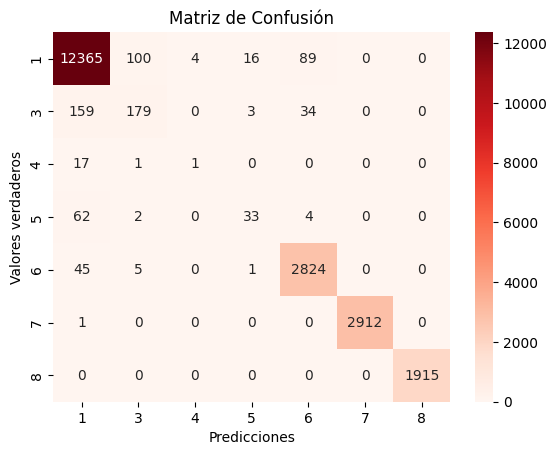

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
ax.set_yticklabels([1,3,4,5,6,7,8])
ax.set_xticklabels([1,3,4,5,6,7,8])
plt.show()

KNN con under sampling

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

    # Aplica el submuestreo a tus datos
    x_sub, y_sub = undersampler.fit_resample(x_train, y_train)

    clf_KNN_B = KNeighborsClassifier(n_neighbors=3)
    clf_KNN_B.fit(x_sub, y_sub)

    y_pred = clf_KNN_B.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.99      0.64      0.78     62872
           3       0.12      0.53      0.20      1876
           4       0.01      0.73      0.02        92
           5       0.04      0.64      0.08       504
           6       0.88      0.89      0.89     14376
           7       0.96      1.00      0.98     14562
           8       1.00      1.00      1.00      9578

    accuracy                           0.76    103860
   macro avg       0.57      0.78      0.56    103860
weighted avg       0.95      0.76      0.83    103860



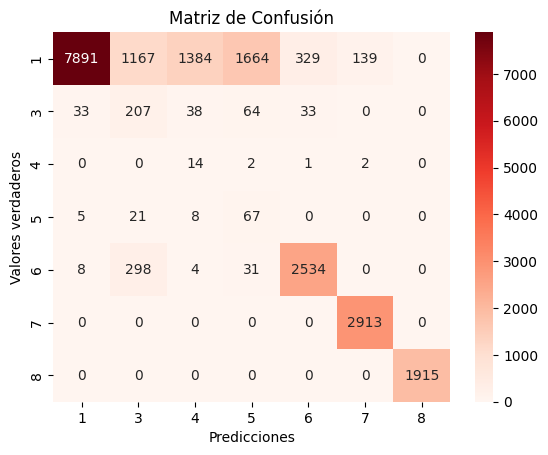

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
ax.set_yticklabels([1,3,4,5,6,7,8])
ax.set_xticklabels([1,3,4,5,6,7,8])
plt.show()

Al analizar los resultados se puede observar como los datos sin balanceo tienen una mejor exactitud, siendo el valor más bajo obtenido 89%, no obstante esto ocurre debido a que la función classification_report omite las clases que obtuvieron un 0 en precisión, por lo tanto no esta tomando en cuenta todos los datos, esto se debe a que los datos que tiene de algunas clases son tan bajos, que no puede predecirlos de forma correcta, por lo tanto para elejir al clasificador nos basaremos en la precisión de cada uno de los datos evaluados con under sampling. En base a esto, se determino que el mejor modelo para este set de datos es Random Forest con under samplimg, debido a que se obtuvo una exactitud de 78% sinedo la más alta entre los diferentes metodos evaluados, aparte de que cuenta con las precisiones más altas entre los otros dos metodos, el unico inconveniente que se tiene es que cuenta con precisiones muy bajas en algunos datos, como 0.01 cuando label es igual a 4 o 0.04 cuando label es igual a 5.

<h2> Optimización y obtención de hiperparametros

Para la optimización de las características se utilizara filter, esto con el proposito de eliminar las variables independientes que no aportan al modelo o que perjudican al modelo.

---- n features = 1
ACC: 0.47174080492971304
---- n features = 2
ACC: 0.6792027729636049
---- n features = 3
ACC: 0.7468611592528405
---- n features = 4
ACC: 0.7777200077026768
---- n features = 5
ACC: 0.7775755825149239
---- n features = 6
ACC: 0.7714519545542077
Optimal number of features:  4


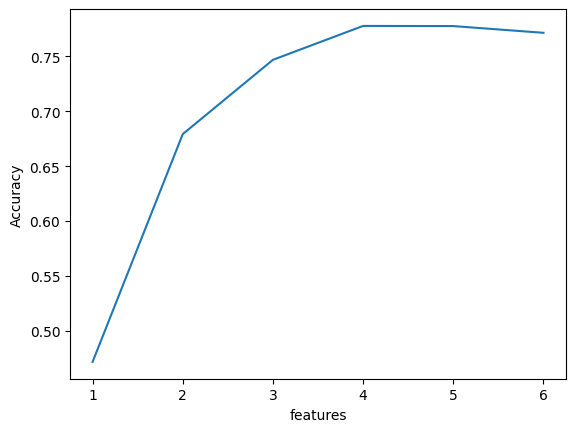

Selected features:  ['x0' 'x2' 'x3' 'x5']


In [ ]:
n_feats = list(range(1,len(x[0])+1))

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

        # Aplica el submuestreo a tus datos
        x_sub, y_sub = undersampler.fit_resample(x_train, y_train)

        clf_RFC_B = RandomForestClassifier()

        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_sub, y_sub)
        x_train = fselection_cv.transform(x_sub)

        clf_RFC_B.fit(x_train, y_sub)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_RFC_B.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

Ajuste de los valores en base a la selección optima de parametros

In [13]:
X = pd.DataFrame(x,columns=['X0','X1','X2','X3','X4','X5'])
X.head()

,X0,X1,X2,X3,X4,X5
0,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096
1,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758
2,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139
3,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781
4,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611


In [14]:
X.drop('X1',axis=1,inplace = True)
X.drop('X4',axis=1,inplace = True)

In [15]:
x = X.to_numpy()

Obtención de hiperparametros

In [16]:
# Define una cuadrícula de hiperparámetros que se quieren probar para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]     # Número mínimo de muestras requeridas en cada hoja
}

In [17]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []
cv_best_params = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

    # Aplica el submuestreo a tus datos
    x_sub, y_sub = undersampler.fit_resample(x_train, y_train)

    clf_RFC_B = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=clf_RFC_B, param_grid=param_grid, cv=3)

    grid_search.fit(x_sub, y_sub)

    # Encuentra los hiperparámetros óptimos
    best_random_forest = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_best_params.append(best_params)

    y_pred = best_random_forest.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print("Hiperparámetros Óptimos Seleccionados para Cada Partición:")

for i, params in enumerate(cv_best_params):
    print(f"Partición {i+1}: {params}")

print('\n')
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

Hiperparámetros Óptimos Seleccionados para Cada Partición:
Partición 1: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Partición 2: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Partición 3: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Partición 4: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Partición 5: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


              precision    recall  f1-score   support

           1       0.99      0.69      0.81     62872
           3       0.15      0.45      0.22      1876
           4       0.01      0.62      0.02        92
           5       0.03      0.61      0.06       504
           6       0.89      0.86      0.87     14376
           7       0.95      1.00      0.98     14562
           8       1.00      1.00      1.00      9578

    acc

<h2>Guardado de los pesos

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(best_random_forest, open(filename, 'wb'))

<h2>Analizis del modelo en otro set de datos

In [5]:
test = pd.read_csv('/content/514.csv')

In [7]:
test.drop('timestamp',axis=1,inplace = True)
test.drop('back_y',axis=1,inplace = True)
test.drop('thigh_y',axis=1,inplace = True)

In [18]:
test_predict = best_random_forest.predict(test.iloc[:,:4].to_numpy())

In [19]:
tabla = pd.DataFrame(test_predict,columns=['Predicción'])
tabla = tabla.merge(test.label,left_index=True, right_index=True)
tabla = tabla.merge(test_predict==test.label,left_index=True, right_index=True)

In [26]:
nuevos_nombres = {'label_x': 'Dato Real', 'label_y': 'Resultado'}
tabla = tabla.rename(columns=nuevos_nombres)

In [27]:
#Tabla de diferencias
print(tabla.sample(n=20))

       Predicción  Dato Real  Resultado
66412           3          6      False
77853           3          1      False
87289           4          1      False
22621           3          6      False
20994           7          7       True
91334           3          6      False
13420           7          7       True
57993           3          1      False
81525           3          1      False
14102           7          7       True
14582           7          7       True
48325           8          8       True
4852            1          1       True
93054           3          1      False
58906           3          6      False
1244            3          6      False
13678           7          7       True
23140           1          1       True
47595           8          8       True
18307           7          7       True


In [ ]:
print('Exactitud con los datos de otra persona:',tabla.label_y.sum()/len(tabla))

Exactitud con los datos de otra persona: 0.26576691951531867


Justificación de la exactitud cuando se evalua con otros datos

In [ ]:
df1 = pd.read_csv('/content/501.csv')
df2 = pd.read_csv('/content/502.csv')
df3 = pd.read_csv('/content/503.csv')
df4 = pd.read_csv('/content/504.csv')
df14= pd.read_csv('/content/514.csv')

In [ ]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df4['timestamp'] = pd.to_datetime(df4['timestamp'])
df14['timestamp'] = pd.to_datetime(df14['timestamp'])

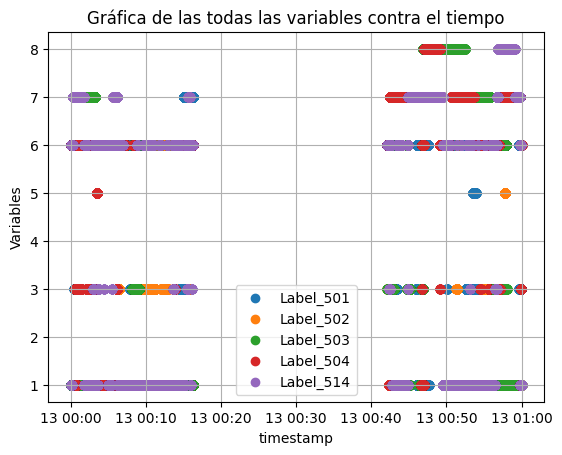

In [ ]:
# Comparando los valores de labels de df 1, 2, 3, 4, 14 a traves del timestamp de df1
columnas = ['Label_501','Label_502','Label_503','Label_504','Label_514']
plt.scatter(df1.timestamp.loc[0:101509],df1.label.loc[0:101509])
plt.scatter(df1.timestamp.loc[0:101509],df2.label.loc[0:101509])
plt.scatter(df1.timestamp.loc[0:101509],df3.label.loc[0:101509])
plt.scatter(df1.timestamp.loc[0:101509],df4.label.loc[0:101509])
plt.scatter(df1.timestamp.loc[0:101509],df14.label)
plt.xlabel(df1.columns[0])
plt.legend(columnas)
plt.ylabel('Variables')
plt.title('Gráfica de las todas las variables contra el tiempo')
plt.grid()


In [ ]:
# Generar índices aleatorios para seleccionar las mismas posiciones en todas las series
np.random.seed(42)  # Establecer una semilla aleatoria para reproducibilidad
indices_aleatorios = np.random.choice(len(df14.label), 10, replace=False)

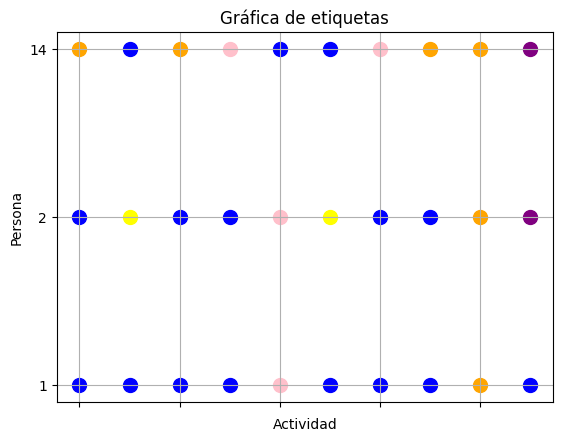

In [ ]:
# Colores correspondientes a cada número
colores = {
    1: 'blue',
    3: 'yellow',
    4: 'green',
    5: 'red' ,
    6: 'purple',
    7: 'orange',
    8: 'pink'
}
columnas = [1,3,4,5,6,7,8]
x = np.arange(len(df14))

fig, ax = plt.subplots()
for i, numero in enumerate(df1.label.iloc[indices_aleatorios]):
    color = colores.get(numero, 'gray')  # Usar 'gray' si el número no tiene un color asignado
    ax.scatter(x[i], 1, c=color, marker='o', s=100)
for i, numero in enumerate(df2.label.iloc[indices_aleatorios]):
    color = colores.get(numero, 'gray')  # Usar 'gray' si el número no tiene un color asignado
    ax.scatter(x[i], 2, c=color, marker='o', s=100)
for i, numero in enumerate(df14.label.iloc[indices_aleatorios]):
    color = colores.get(numero, 'gray')  # Usar 'gray' si el número no tiene un color asignado
    ax.scatter(x[i], 3, c=color, marker='o', s=100)

ax.set_xticklabels([])
ax.set_yticks([1, 2, 3])
ax.set_yticklabels([1, 2, 14])
plt.ylabel('Persona')
plt.xlabel('Actividad')
plt.title('Gráfica de etiquetas')
plt.grid()

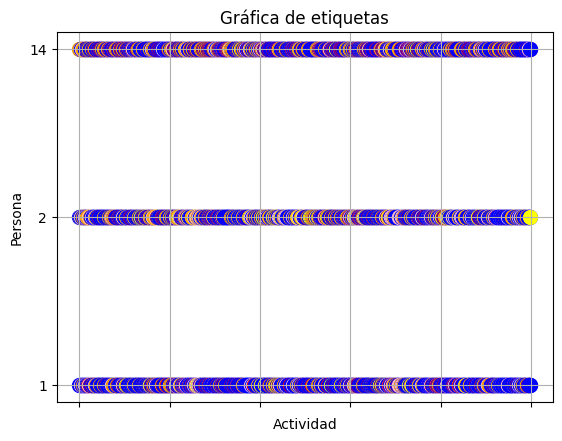

In [73]:
# Generar índices aleatorios para seleccionar las mismas posiciones en todas las series
np.random.seed(42)  # Establecer una semilla aleatoria para reproducibilidad
indices_aleatorios = np.random.choice(len(df14.label), 1000, replace=False)

# Colores correspondientes a cada número
colores = {
    1: 'blue',
    3: 'yellow',
    4: 'green',
    5: 'red' ,
    6: 'purple',
    7: 'orange',
    8: 'pink'
}
columnas = [1,3,4,5,6,7,8]
x = np.arange(len(df14))

fig, ax = plt.subplots()
for i, numero in enumerate(df1.label.iloc[indices_aleatorios]):
    color = colores.get(numero, 'gray')  # Usar 'gray' si el número no tiene un color asignado
    ax.scatter(x[i], 1, c=color, marker='o', s=100)
for i, numero in enumerate(df2.label.iloc[indices_aleatorios]):
    color = colores.get(numero, 'gray')  # Usar 'gray' si el número no tiene un color asignado
    ax.scatter(x[i], 2, c=color, marker='o', s=100)
for i, numero in enumerate(df14.label.iloc[indices_aleatorios]):
    color = colores.get(numero, 'gray')  # Usar 'gray' si el número no tiene un color asignado
    ax.scatter(x[i], 3, c=color, marker='o', s=100)

ax.set_xticklabels([])
ax.set_yticks([1, 2, 3])
ax.set_yticklabels([1, 2, 14])
plt.ylabel('Persona')
plt.xlabel('Actividad')
plt.title('Gráfica de etiquetas')
plt.grid()